In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = 6*np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9*X +2+np.random.rand(200,1)

# the original coefficents are 0.8 , 0.9 and the intercept is 2
# we need to find the coefficients closest to the actual one

In [ ]:
# our task is to find the coefficients and the intercept term

Text(0, 0.5, 'y')

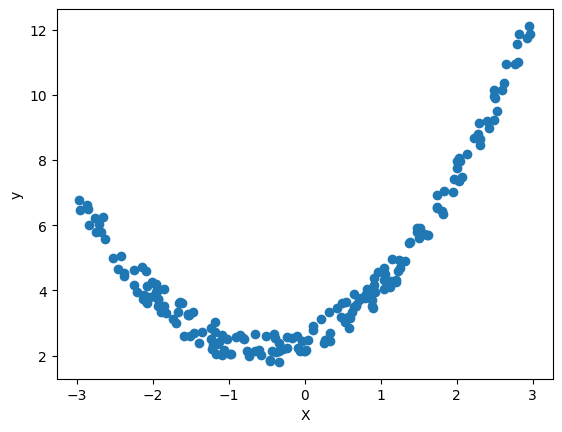

In [ ]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)
print(lr.coef_)
print(lr.intercept_)

0.24327395902261217
[[0.90986384]]
[4.67006192]


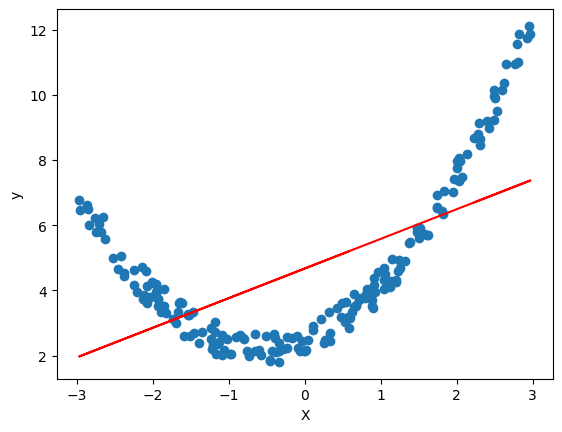

In [ ]:

plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")

# the r2 score is less because
plt.plot(X_train,lr.predict(X_train),color = 'r')

Apply the polynomial regression

In [ ]:
# the staright line is not a good fit for the non linear graph

In [ ]:
# transform the features using polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# the polynomial features are only applied on the input data and not on the output data
# apply the polynomial features on both the train and test for the input data

In [ ]:
X_train[0]

array([0.56985378])

In [ ]:
X_train_poly[0]

array([1.        , 0.56985378, 0.32473334])

In [ ]:
lr.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_poly)

In [ ]:
r2_score(y_test,y_pred)

0.9829780997293142

In [ ]:
print(lr.coef_)

[[0.         0.90788706 0.80063984]]


In [ ]:
print(lr.intercept_)

[2.48341851]


In the above case there was only one input column.Now applying the polynomial regression on the daat having more than one input columns

In [ ]:
X = 7 * np.random.rand(100,1)-2.8
y = 7 * np.random.rand(100,1)-2.8
z = X**2 + y**2 +0.2*X + 0.2*y + 0.1*X*y +2 + np.random.randn(100,1)

# actual relationship = x^2 +y^2 +0.2x +0.2y +0.1xy

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=X.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [ ]:
X.shape

(100, 1)

In [ ]:
y.shape

(100, 1)

In [ ]:

lr = LinearRegression()
lr.fit(np.array([X,y]).reshape(100,2),z)

x_input = np.linspace(X.min(), X.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [ ]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=X.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [ ]:
X_multi = np.array([X,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [ ]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [ ]:
print(dir(poly))


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_combinations', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_num_combinations', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'degree', 'fit', 'fit_transform', 'get_feature_names_out', 'get_metadata_routing', 'get_params', 'include